In [ ]:
pip install tensorflow pandas numpy scikit-learn matplotlib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [10]:

# Cargar un dataset CSV
file_path ='Reservas estancias días hotel procesado 3.csv';
df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')

# Mostrar las primeras filas del dataset para verificar la carga
print(df.head())

   dias  antelacion     checkin    checkout     reserva  pension  \
0     9         110  2024-12-27  2025-01-05  2024-09-08        1   
1     9         110  2024-12-27  2025-01-05  2024-09-08        1   
2     9         110  2024-12-27  2025-01-05  2024-09-08        1   
3     9         110  2024-12-27  2025-01-05  2024-09-08        1   
4     9         110  2024-12-27  2025-01-05  2024-09-08        1   

   categoria_habitacion  num_adults  num_childs  precio_habitacion  ...  \
0                    90           2           0               1620  ...   
1                    90           2           0               1620  ...   
2                    90           2           0               1620  ...   
3                    90           2           0               1620  ...   
4                    90           2           0               1620  ...   

   state  province  postal_code  evento         dia id_reserva  diaSemana max  \
0     GB       NaN     SW19 3EJ     NaN  2024-12-27       6

C:\Users\Igna\AppData\Local\Temp\ipykernel_26092\1492385992.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')


In [11]:
#columnas_a_modificar = ['max','min','precipitaciones']
columnas_a_modificar = ['max','min']

for columna in columnas_a_modificar:
    # Calcular la media de la columna ignorando los valores nulos
    media_columna = df[columna].mean()
    
    # Reemplazar los valores nulos por la media
    df[columna].fillna(media_columna, inplace=True)

# Verificar el resultado
print(df.head())

   dias  antelacion     checkin    checkout     reserva  pension  \
0     9         110  2024-12-27  2025-01-05  2024-09-08        1   
1     9         110  2024-12-27  2025-01-05  2024-09-08        1   
2     9         110  2024-12-27  2025-01-05  2024-09-08        1   
3     9         110  2024-12-27  2025-01-05  2024-09-08        1   
4     9         110  2024-12-27  2025-01-05  2024-09-08        1   

   categoria_habitacion  num_adults  num_childs  precio_habitacion  ...  \
0                    90           2           0               1620  ...   
1                    90           2           0               1620  ...   
2                    90           2           0               1620  ...   
3                    90           2           0               1620  ...   
4                    90           2           0               1620  ...   

   state  province  postal_code  evento         dia id_reserva  diaSemana  \
0     GB       NaN     SW19 3EJ     NaN  2024-12-27       6097 

In [12]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('Reservas estancias días hotel procesado 4.csv', index=False)


In [13]:
import numpy as np


# Convertir la columna de fecha en tipo datetime
df['checkin'] = pd.to_datetime(df['checkin'])
# Extraer el mes y el día del mes
df['mes'] = df['checkin'].dt.month
df['dia_mes'] = df['checkin'].dt.day
# Convertir el mes en variables cíclicas
df['checkin_sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['checkin_cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)
# Convertir el día del mes en variables cíclicas
df['checkin_sin_dia_mes'] = np.sin(2 * np.pi * df['dia_mes'] / 31)
df['checkin_cos_dia_mes'] = np.cos(2 * np.pi * df['dia_mes'] / 31)

# Convertir la columna de fecha en tipo datetime
df['checkout'] = pd.to_datetime(df['checkout'])
# Extraer el mes y el día del mes
df['mes'] = df['checkout'].dt.month
df['dia_mes'] = df['checkout'].dt.day
# Convertir el mes en variables cíclicas
df['checkout_sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['checkout_cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)
# Convertir el día del mes en variables cíclicas
df['checkout_sin_dia_mes'] = np.sin(2 * np.pi * df['dia_mes'] / 31)
df['checkout_cos_dia_mes'] = np.cos(2 * np.pi * df['dia_mes'] / 31)

# Convertir la columna de fecha en tipo datetime
df['reserva'] = pd.to_datetime(df['reserva'])
# Extraer el mes y el día del mes
df['mes'] = df['reserva'].dt.month
df['dia_mes'] = df['reserva'].dt.day
# Convertir el mes en variables cíclicas
df['reserva_sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['reserva_cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)
# Convertir el día del mes en variables cíclicas
df['reserva_sin_dia_mes'] = np.sin(2 * np.pi * df['dia_mes'] / 31)
df['reserva_cos_dia_mes'] = np.cos(2 * np.pi * df['dia_mes'] / 31)

# Convertir la columna de fecha en tipo datetime
df['dia'] = pd.to_datetime(df['dia'])
# Extraer el mes y el día del mes
df['mes'] = df['dia'].dt.month
df['dia_mes'] = df['dia'].dt.day
# Convertir el mes en variables cíclicas
df['dia_sin_mes'] = np.sin(2 * np.pi * df['mes'] / 12)
df['dia_cos_mes'] = np.cos(2 * np.pi * df['mes'] / 12)
# Convertir el día del mes en variables cíclicas
df['dia_sin_dia_mes'] = np.sin(2 * np.pi * df['dia_mes'] / 31)
df['dia_cos_dia_mes'] = np.cos(2 * np.pi * df['dia_mes'] / 31)

columns_to_drop = ['checkin', 'checkout', 'reserva', 'dia']
df = df.drop(columns=columns_to_drop)

# Visualizar el resultado
df.head()

,dias,antelacion,pension,categoria_habitacion,num_adults,num_childs,precio_habitacion,agency_commission,discount_amount,status,...,checkout_sin_dia_mes,checkout_cos_dia_mes,reserva_sin_mes,reserva_cos_mes,reserva_sin_dia_mes,reserva_cos_dia_mes,dia_sin_mes,dia_cos_mes,dia_sin_dia_mes,dia_cos_dia_mes
0,9,110,1,90,2,0,1620,15,0,3,...,0.848644,0.528964,-1.0,-1.836970e-16,0.998717,-0.050649,-2.449294e-16,1.0,-7.247928e-01,0.688967
1,9,110,1,90,2,0,1620,15,0,3,...,0.848644,0.528964,-1.0,-1.836970e-16,0.998717,-0.050649,-2.449294e-16,1.0,-5.712682e-01,0.820763
2,9,110,1,90,2,0,1620,15,0,3,...,0.848644,0.528964,-1.0,-1.836970e-16,0.998717,-0.050649,-2.449294e-16,1.0,-3.943559e-01,0.918958
3,9,110,1,90,2,0,1620,15,0,3,...,0.848644,0.528964,-1.0,-1.836970e-16,0.998717,-0.050649,-2.449294e-16,1.0,-2.012985e-01,0.979530
4,9,110,1,90,2,0,1620,15,0,3,...,0.848644,0.528964,-1.0,-1.836970e-16,0.998717,-0.050649,-2.449294e-16,1.0,-2.449294e-16,1.000000


In [14]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('Reservas estancias días hotel procesado 5.csv', index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Cargar un dataset CSV
file_path ='Reservas estancias días hotel procesado 5.csv';
df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')

# Mostrar las primeras filas del dataset para verificar la carga
print(df.head())

C:\Users\Igna\AppData\Local\Temp\ipykernel_11452\2839099106.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')


   dias  antelacion  pension  categoria_hab107acion  num_adults  num_childs  \
0     9         110        1                     90           2           0   
1     9         110        1                     90           2           0   
2     9         110        1                     90           2           0   
3     9         110        1                     90           2           0   
4     9         110        1                     90           2           0   

   precio_habitacion  agency_commission  discount_amount  status  ...  \
0               1620                 15                0       3  ...   
1               1620                 15                0       3  ...   
2               1620                 15                0       3  ...   
3               1620                 15                0       3  ...   
4               1620                 15                0       3  ...   

   checkout_cos_dia_mes  reserva_sin_mes  reserva_cos_mes  \
0              0.528964  

In [3]:
# Crear las columnas de ocupación pasada para 1, 2, 3, 4, 5, 10 días
dias_a_retrasar = [1, 2, 3, 4, 5, 10]

for dia in dias_a_retrasar:
    # Usamos shift() para crear la columna de ocupación pasada
    df[f'ocupacion_pasada_{dia}_dias'] = df['ocupacion'].shift(dia)

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print(df.head())

   dias  antelacion  pension  categoria_hab107acion  num_adults  num_childs  \
0     9         110        1                     90           2           0   
1     9         110        1                     90           2           0   
2     9         110        1                     90           2           0   
3     9         110        1                     90           2           0   
4     9         110        1                     90           2           0   

   precio_habitacion  agency_commission  discount_amount  status  ...  \
0               1620                 15                0       3  ...   
1               1620                 15                0       3  ...   
2               1620                 15                0       3  ...   
3               1620                 15                0       3  ...   
4               1620                 15                0       3  ...   

   dia_cos_mes       dia_sin_dia_mes  dia_cos_dia_mes  ocupacion  \
0          1.0    

In [8]:
import pandas as pd
df  = pd.read_csv('Reservas estancias días hotel procesado 9 ciudad y id y cluster.csv', encoding='ISO-8859-1', delimiter=';')

In [9]:
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def preparar_datos_lstm(data, n_steps):
    """
    Prepara los datos para el LSTM creando secuencias.
    data: numpy array con los datos escalados
    n_steps: número de pasos a incluir en cada secuencia
    """
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])  # Todas las columnas menos la última (target)
        y.append(data[i + n_steps, -1])  # La última columna como target
    return np.array(X), np.array(y)

# Paso 1: Normalizar los datos (se convierte a numpy array)
scaler = MinMaxScaler()
cluster_0_scaled = scaler.fit_transform(cluster_0)  # Esto genera un array de NumPy
cluster_1_scaled = scaler.fit_transform(cluster_1)
cluster_2_scaled = scaler.fit_transform(cluster_2)

# Paso 2: Definir el número de pasos de la secuencia
n_steps = 10

# Paso 3: Preparar los datos para cada clúster (ya es un array de NumPy)
X_cluster_0, y_cluster_0 = preparar_datos_lstm(cluster_0_scaled, n_steps)
X_cluster_1, y_cluster_1 = preparar_datos_lstm(cluster_1_scaled, n_steps)
X_cluster_2, y_cluster_2 = preparar_datos_lstm(cluster_2_scaled, n_steps)

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_cluster_0, y_cluster_0, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cluster_1, y_cluster_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_cluster_2, y_cluster_2, test_size=0.2, random_state=42)

# A partir de los datos de entrenamiento, dividir en entrenamiento y validación
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(X_train_0, y_train_0, test_size=0.25, random_state=42)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.25, random_state=42)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.25, random_state=42)
# (Ahora tienes 60% entrenamiento, 20% validación, 20% prueba)



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def crear_modelo_lstm(n_steps, n_features):
    """
    Crea un modelo LSTM con una capa LSTM y una capa Dense.
    """
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Obtener el número de características (n_features) a partir de los datos escalados
n_features = X_cluster_0.shape[2]

# Crear y entrenar el modelo para cada clúster
modelo_cluster_0 = crear_modelo_lstm(n_steps, n_features)
history0 = modelo_cluster_0.fit(X_train_0, y_train_0, 
                               epochs=15, 
                               validation_data=(X_val_0, y_val_0),
                               verbose=1)







Epoch 1/15

1312/1312 [==============================] - 19s 11ms/step - loss: 0.0082 - val_loss: 0.0051
Epoch 2/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0050 - val_loss: 0.0057
Epoch 3/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 4/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 5/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 6/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 7/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 8/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 9/15
1312/1312 [==============================] - 14s 11ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 10/15
1312/1312 [==============================] - 14s 

In [12]:
modelo_cluster_1 = crear_modelo_lstm(n_steps, n_features)
history1 = modelo_cluster_0.fit(X_train_1, y_train_1, 
                               epochs=15, 
                               validation_data=(X_val_1, y_val_1),
                               verbose=1)

Epoch 1/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 2/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 3/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 4/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 5/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 6/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 7/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0070 - val_loss: 0.0074
Epoch 8/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0069 - val_loss: 0.0072
Epoch 9/15
1770/1770 [==============================] - 19s 11ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 10/15
1770/1770 [==============================] - 19s 11m

In [13]:
modelo_cluster_2 = crear_modelo_lstm(n_steps, n_features)
history2 = modelo_cluster_0.fit(X_train_2, y_train_2, 
                               epochs=15, 
                               validation_data=(X_val_2, y_val_2),
                               verbose=1)


Epoch 1/15
2201/2201 [==============================] - 24s 11ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 2/15
2201/2201 [==============================] - 23s 11ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 3/15
2201/2201 [==============================] - 24s 11ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 4/15
2201/2201 [==============================] - 23s 11ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 5/15
2201/2201 [==============================] - 24s 11ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 6/15
2201/2201 [==============================] - 23s 11ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 7/15
2201/2201 [==============================] - 23s 11ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 8/15
2201/2201 [==============================] - 23s 11ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 9/15
2201/2201 [==============================] - 23s 11ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 10/15
2201/2201 [==============================] - 24s 11m

In [14]:
# Evaluar el modelo en los datos de prueba
test_loss0 = modelo_cluster_0.evaluate(X_test_0, y_test_0)
print(f"Test Loss for Cluster 0: {test_loss0}")

test_loss1 = modelo_cluster_1.evaluate(X_test_1, y_test_1)
print(f"Test Loss for Cluster 1: {test_loss1}")

test_loss2 = modelo_cluster_2.evaluate(X_test_2, y_test_2)
print(f"Test Loss for Cluster 2: {test_loss2}")


438/438 [==============================] - 2s 6ms/step - loss: 0.0122
Test Loss for Cluster 0: 0.012248423881828785
590/590 [==============================] - 4s 5ms/step - loss: 0.1202
Test Loss for Cluster 1: 0.12016617506742477
734/734 [==============================] - 5s 6ms/step - loss: 0.4088
Test Loss for Cluster 2: 0.4087682068347931


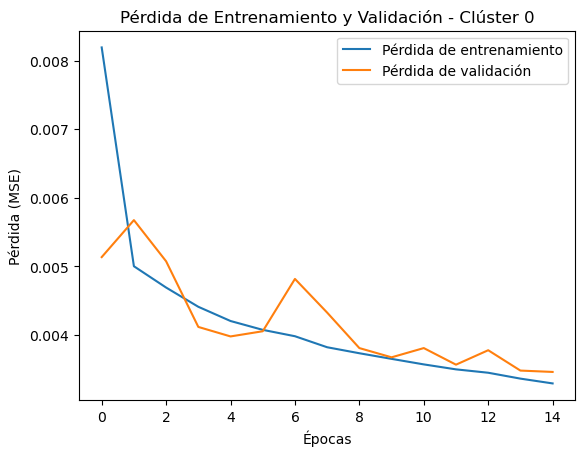

In [15]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history0.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history0.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación - Clúster 0')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

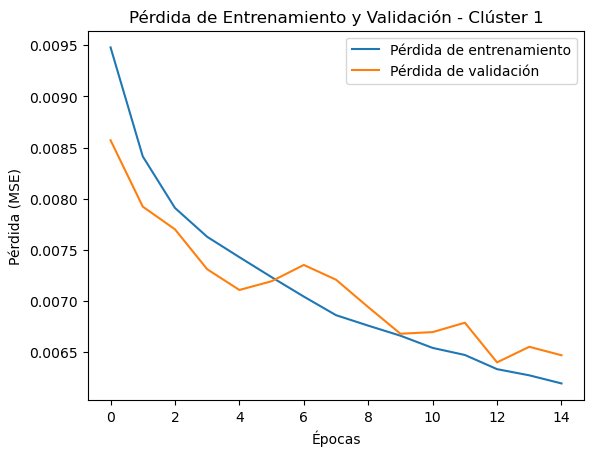

In [16]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación - Clúster 1')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

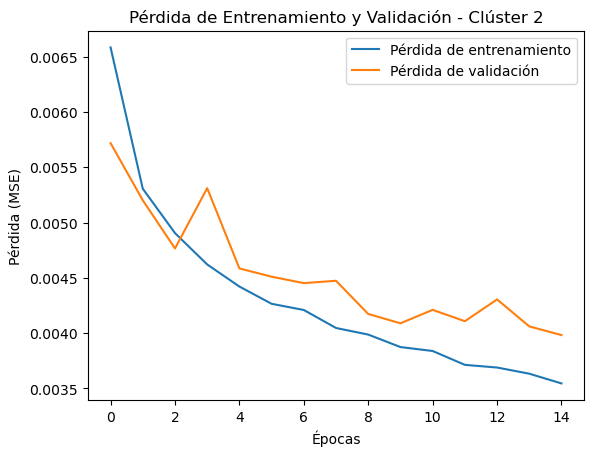

In [17]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history2.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history2.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación - Clúster 2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

In [18]:
# Evaluar el modelo en los datos de prueba (MSE es la métrica que usamos en la compilación del modelo)
test_loss_mse0 = modelo_cluster_0.evaluate(X_test_0, y_test_0)
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse0}')

# Evaluar el modelo en los datos de prueba (MSE es la métrica que usamos en la compilación del modelo)
test_loss_mse1 = modelo_cluster_1.evaluate(X_test_1, y_test_1)
print(f'MSE (Pérdida) en datos de prueba - Clúster 1: {test_loss_mse1}')

# Evaluar el modelo en los datos de prueba (MSE es la métrica que usamos en la compilación del modelo)
test_loss_mse2 = modelo_cluster_2.evaluate(X_test_2, y_test_2)
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse2}')

438/438 [==============================] - 3s 6ms/step - loss: 0.0122
MSE (Pérdida) en datos de prueba - Clúster 0: 0.012248423881828785
590/590 [==============================] - 4s 6ms/step - loss: 0.1202
MSE (Pérdida) en datos de prueba - Clúster 1: 0.12016617506742477
734/734 [==============================] - 4s 6ms/step - loss: 0.4088
MSE (Pérdida) en datos de prueba - Clúster 0: 0.4087682068347931


In [19]:
# Hacer predicciones en los datos de prueba
y_pred_0 = modelo_cluster_0.predict(X_test_0)

# Hacer predicciones en los datos de prueba
y_pred_1 = modelo_cluster_1.predict(X_test_1)

# Hacer predicciones en los datos de prueba
y_pred_2 = modelo_cluster_2.predict(X_test_2)

734/734 [==============================] - 5s 6ms/step


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calcular el MSE y RMSE
mse0 = mean_squared_error(y_test_0, y_pred_0)
rmse0 = np.sqrt(mse0)
print(f'RMSE en datos de prueba - Clúster 0: {rmse0}')

# Calcular el MAE
mae0 = mean_absolute_error(y_test_0, y_pred_0)
print(f'MAE en datos de prueba - Clúster 0: {mae0}')





# Calcular el MSE y RMSE
mse1 = mean_squared_error(y_test_1, y_pred_1)
rmse1 = np.sqrt(mse1)
print(f'RMSE en datos de prueba - Clúster 1: {rmse1}')

# Calcular el MAE
mae1 = mean_absolute_error(y_test_1, y_pred_1)
print(f'MAE en datos de prueba - Clúster 1: {mae1}')





# Calcular el MSE y RMSE
mse2 = mean_squared_error(y_test_2, y_pred_2)
rmse2 = np.sqrt(mse2)
print(f'RMSE en datos de prueba - Clúster 2: {rmse2}')

# Calcular el MAE
mae2 = mean_absolute_error(y_test_2, y_pred_2)
print(f'MAE en datos de prueba - Clúster 2: {mae2}')


RMSE en datos de prueba - Clúster 0: 0.11067259472273305
MAE en datos de prueba - Clúster 0: 0.07204815108835316
RMSE en datos de prueba - Clúster 1: 0.3466498929106296
MAE en datos de prueba - Clúster 1: 0.2621709553298284
RMSE en datos de prueba - Clúster 2: 0.6393500287453804
MAE en datos de prueba - Clúster 2: 0.5436679993051629


In [22]:
# MSE ya lo obtuvimos durante la evaluación del modelo
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse0}')
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse1}')
print(f'MSE (Pérdida) en datos de prueba - Clúster 0: {test_loss_mse2}')

# RMSE
print(f'RMSE en datos de prueba - Clúster 0: {rmse0}')
print(f'RMSE en datos de prueba - Clúster 0: {rmse1}')
print(f'RMSE en datos de prueba - Clúster 0: {rmse2}')

# MAE
print(f'MAE en datos de prueba - Clúster 0: {mae0}')
print(f'MAE en datos de prueba - Clúster 0: {mae1}')
print(f'MAE en datos de prueba - Clúster 0: {mae2}')


MSE (Pérdida) en datos de prueba - Clúster 0: 0.012248423881828785
MSE (Pérdida) en datos de prueba - Clúster 0: 0.12016617506742477
MSE (Pérdida) en datos de prueba - Clúster 0: 0.4087682068347931
RMSE en datos de prueba - Clúster 0: 0.11067259472273305
RMSE en datos de prueba - Clúster 0: 0.3466498929106296
RMSE en datos de prueba - Clúster 0: 0.6393500287453804
MAE en datos de prueba - Clúster 0: 0.07204815108835316
MAE en datos de prueba - Clúster 0: 0.2621709553298284
MAE en datos de prueba - Clúster 0: 0.5436679993051629


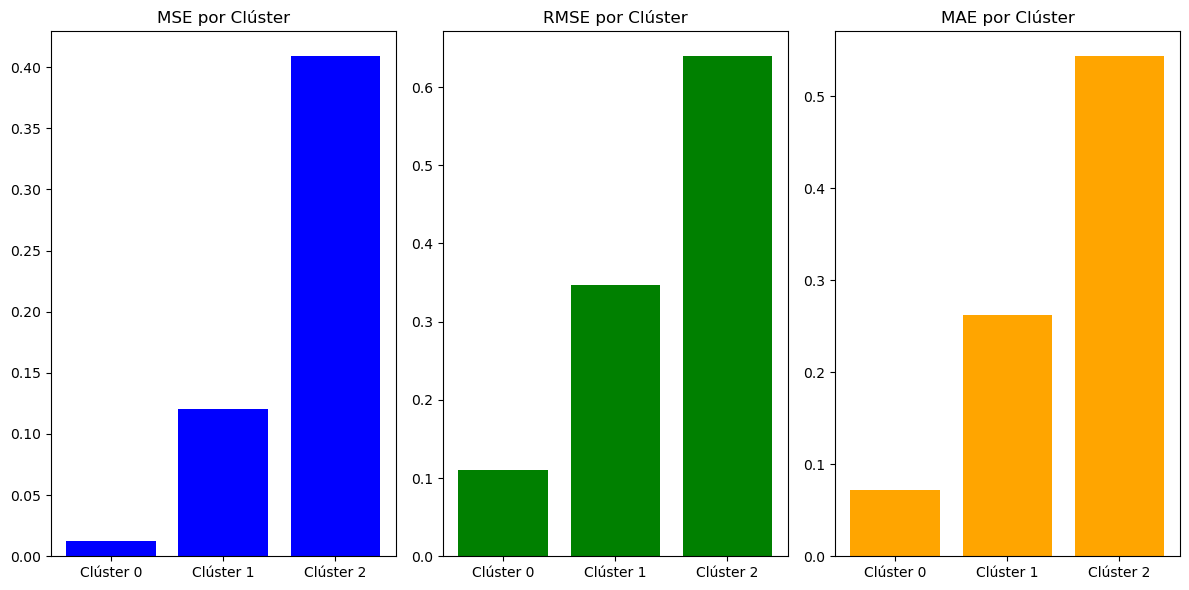

In [23]:
import matplotlib.pyplot as plt

# Métricas para cada clúster
mse_values = [test_loss_mse0, test_loss_mse1, test_loss_mse2]
rmse_values = [rmse0, rmse1, rmse2]
mae_values = [mae0, mae1, mae2]

# Graficar las métricas
clusters = ['Clúster 0', 'Clúster 1', 'Clúster 2']

plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 3, 1)
plt.bar(clusters, mse_values, color='blue')
plt.title('MSE por Clúster')

# RMSE
plt.subplot(1, 3, 2)
plt.bar(clusters, rmse_values, color='green')
plt.title('RMSE por Clúster')

# MAE
plt.subplot(1, 3, 3)
plt.bar(clusters, mae_values, color='orange')
plt.title('MAE por Clúster')

plt.tight_layout()
plt.show()


In [24]:
# Guardar el modelo para el Clúster 0
modelo_cluster_0.save('modelo_cluster_0.h5')

# Guardar el modelo para el Clúster 1
modelo_cluster_1.save('modelo_cluster_1.h5')

# Guardar el modelo para el Clúster 2
modelo_cluster_2.save('modelo_cluster_2.h5')


C:\Users\Igna\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Pronóstico futuro (Opcional)
dias_a_predecir = 7
input_datos = ocupacion_scaled[-pasos:]  # Usamos los últimos 30 días

predicciones_futuras = []

for _ in range(dias_a_predecir):
    # Redimensionamos los datos para que sean compatibles con LSTM
    input_datos_reshaped = input_datos.reshape(1, pasos, 1)
    
    # Hacemos la predicción
    prediccion = model.predict(input_datos_reshaped)
    predicciones_futuras.append(prediccion[0, 0])
    
    # Agregamos la nueva predicción a la secuencia y eliminamos el valor más antiguo
    input_datos = np.append(input_datos[1:], prediccion, axis=0)

# Desescalamos las predicciones
predicciones_futuras = scaler.inverse_transform(np.array(predicciones_futuras).reshape(-1, 1))

print("Predicciones futuras para los próximos días:")
print(predicciones_futuras)
